# Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Reading data

In [2]:
train_df= pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

# Explore data

In [3]:
train_df.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


In [4]:
train_df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
train_df.shape,test_df.shape

((90615, 10), (60411, 9))

In [6]:
train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
test_df.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
5,90620,M,0.560,0.425,0.140,0.8105,0.3525,0.1915,0.2150
6,90621,M,0.635,0.490,0.170,1.1835,0.4605,0.2445,0.3550
7,90622,I,0.340,0.250,0.075,0.1675,0.0750,0.0330,0.0480
8,90623,I,0.485,0.370,0.110,0.5360,0.2565,0.0980,0.1490
9,90624,F,0.640,0.500,0.195,1.3380,0.6470,0.3175,0.3965


In [9]:
test_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

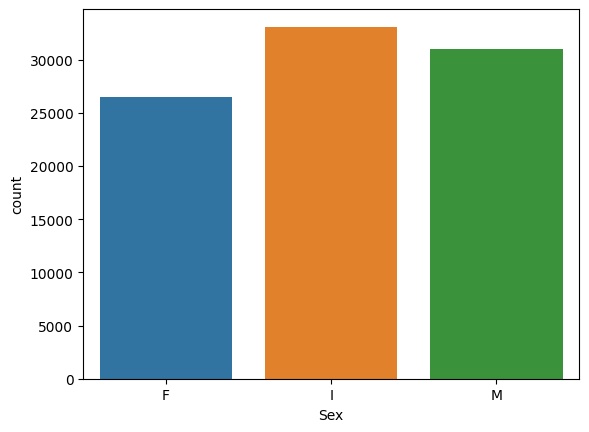

In [10]:
#plotting the counts of each category in the categorical column 
sns.countplot(x='Sex',data=train_df)

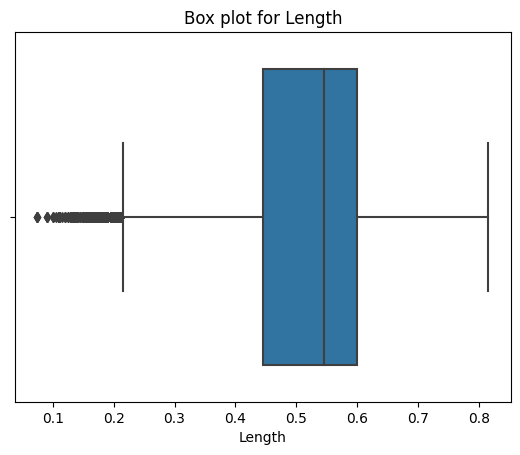

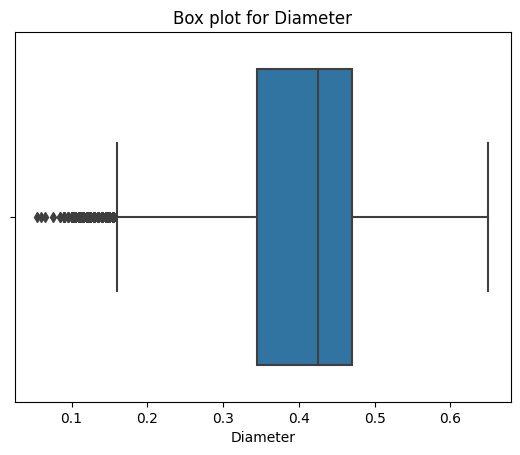

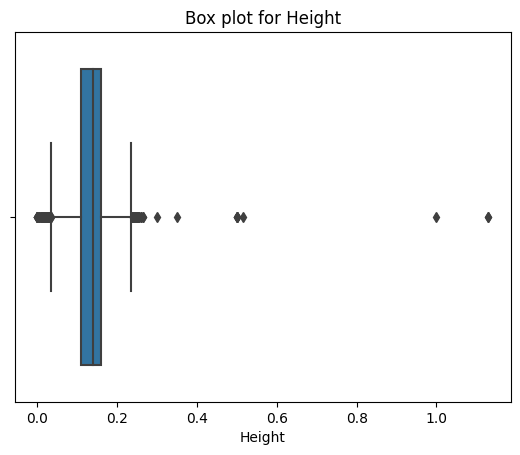

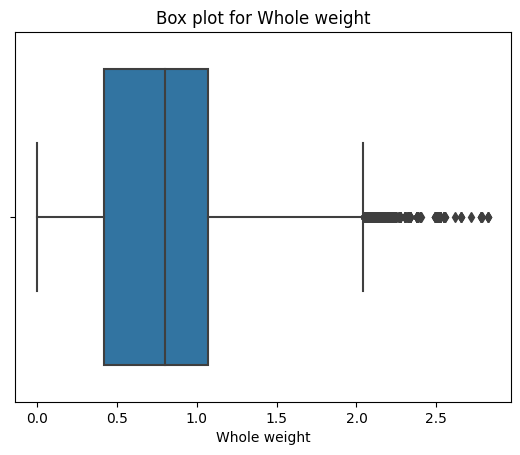

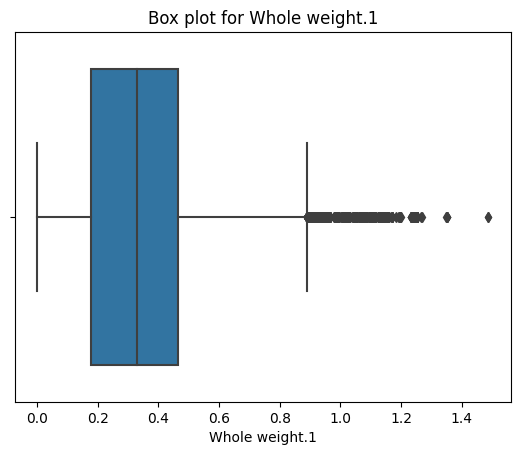

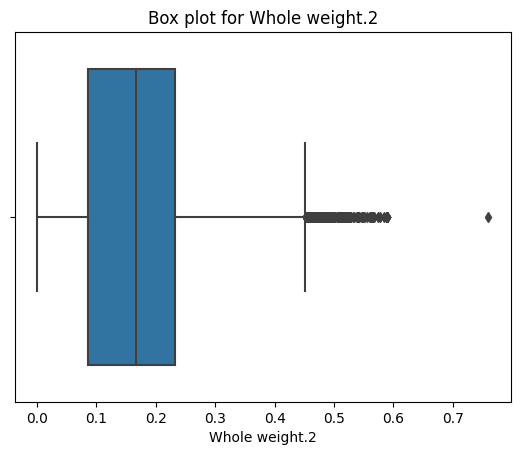

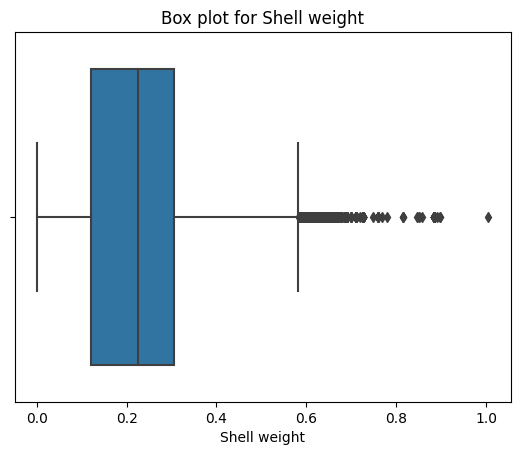

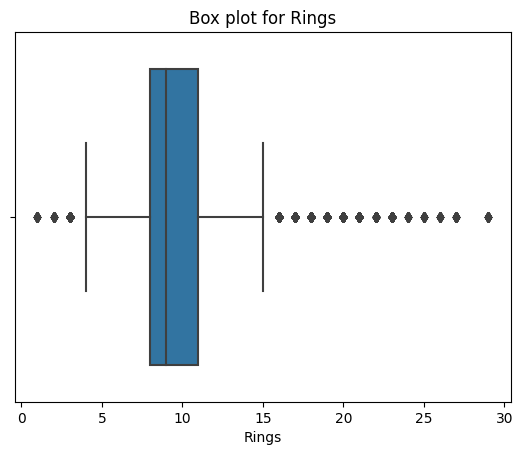

In [11]:
#boxplots for numerical data 
numerical_cols = train_df.drop('id',axis=1).select_dtypes(include=['int64', 'float64'])

for col in numerical_cols.columns:
    sns.boxplot(x=train_df[col])
    plt.title(f'Box plot for {col}')
    plt.show()

One Hot Encoding for categorical columns 

In [12]:
#encoding Training data 
one_hot_encoded_train = pd.get_dummies(train_df['Sex'], prefix='Sex',dtype=int)
encoded_train = pd.concat([train_df, one_hot_encoded_train], axis=1)
encoded_train = encoded_train.drop('Sex',axis=1)

#encoding testing data
one_hot_encoded_test = pd.get_dummies(test_df['Sex'], prefix='Sex',dtype=int)
encoded_test = pd.concat([test_df, one_hot_encoded_test], axis=1)
encoded_test = encoded_test.drop('Sex',axis=1)

<Axes: >

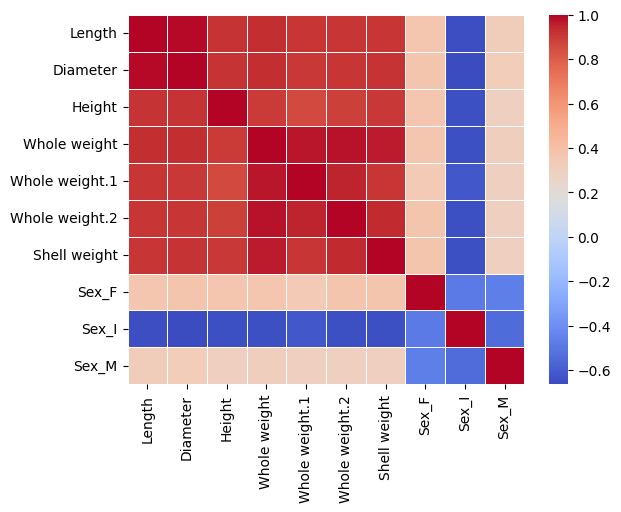

In [13]:
#plotting heatmap
df= encoded_train.drop(['id','Rings'],axis=1)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=0.5)

# Training and testing the model

In [14]:
#splitting training data 
X = encoded_train.drop(['id','Rings'],axis=1)
target = encoded_train['Rings']
X_train ,X_valid , y_train ,y_valid = train_test_split(X , target , test_size=0.2 , random_state=0)

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'n_estimators': [200, 500, 1000, 2000],
    'min_samples_split': [2, 5, 10]
}

In [22]:
#random forest regressor 
rf = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
rf_best_params = grid_search.best_params_
rf_best_model = grid_search.best_estimator_
y_pred = rf_best_model.predict(X_valid)
rf_mae = mean_absolute_error(y_valid, y_pred)

# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_valid)
# rf_mae = mean_absolute_error(y_valid, y_pred)
print(rf_mae)

KeyboardInterrupt: 

In [24]:
#XGB regressor 
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
xgb_best_params = grid_search.best_params_
xgb_best_model = grid_search.best_estimator_
y_pred = xgb_best_model.predict(X_valid)
xgb_mae = mean_absolute_error(y_valid, y_pred)

# xgb.fit(X_train, y_train)
# y_pred_xgb = xgb.predict(X_valid)
# xgb_mae = mean_absolute_error(y_valid, y_pred_xgb)
print(xgb_mae)

ValueError: Invalid parameter 'learning_rate' for estimator RandomForestRegressor(random_state=0). Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

# Predict the data

In [ ]:
encoded_test.drop('id',axis=1,inplace=True)
encoded_test.head()

In [ ]:
#predicting test data 
# predictions= xgb.predict(encoded_test)
predictions = rf_best_model.predict(encoded_test)*0.6 + xgb_best_model.predict(encoded_test)*0.4

In [ ]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "Rings":predictions
})
submission.head()

In [ ]:
submission.to_csv("submission.csv",index = False)

pd.read_csv('/kaggle/working/submission.csv')